# Predicting Indie Game Success on Steam

## Project Overview
This project aims to predict the success of indie games on Steam using machine learning models. The goal is to understand which features of a game contribute most to its success in terms of user recommendations and to optimize model performance.

## Modeling Approaches
Three main models will be employed: Random Forest, Logistic Regression, and Support Vector Machine (SVM). We will train these models with various feature sets to explore their effectiveness:
1. Using a single feature (`Recommendations`) to establish a baseline.
2. Adding features incrementally to demonstrate the impact on model performance.
3. Addressing class imbalance and optimizing the models via hyperparameter tuning.

## Objectives
1. Establish a baseline performance using a single-feature model.
2. Experiment with stepwise addition of features to improve accuracy.
3. Balance classes and tune models for improved results.
4. Evaluate models using accuracy, precision, recall, and F1-score metrics.




In [5]:
# Cell 1: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




In [6]:
# Cell 2: Load the cleaned dataset and convert 'Release Date' to datetime format
dataset_path = r"C:\Users\derek\OneDrive\Documents\Capstone\steam-indie-success\data\steam_indie_games_cleaned_v3.csv"
data = pd.read_csv(dataset_path)

# Convert 'Release Date' to datetime format
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')

# Verify the conversion
print(data['Release Date'].head())
print(data.info())





0   2023-10-27
1   2015-02-27
2   2024-01-06
3   2021-08-25
4   2015-08-14
Name: Release Date, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   AppID                             287 non-null    int64         
 1   Game Name                         287 non-null    object        
 2   Release Date                      287 non-null    datetime64[ns]
 3   Price ($)                         287 non-null    float64       
 4   Action                            287 non-null    bool          
 5   Adventure                         287 non-null    bool          
 6   Casual                            287 non-null    bool          
 7   Early Access                      287 non-null    bool          
 8   Free To Play                      287 non-null    bool          
 9   Gor

Full Dataset Target Distribution:
Original_Recommendations
0    171
1    116
Name: count, dtype: int64


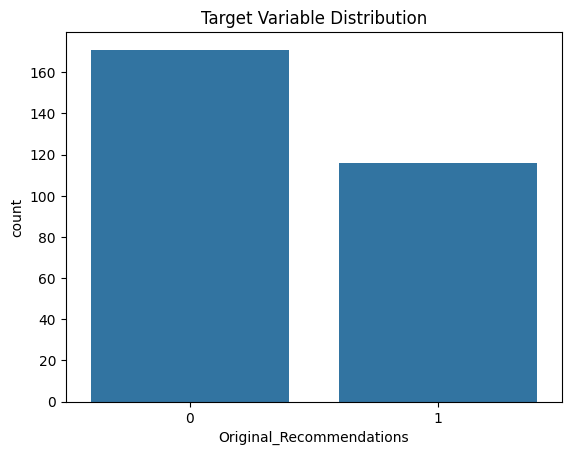


Training Target Distribution:
Original_Recommendations
0    136
1     93
Name: count, dtype: int64

Testing Target Distribution:
Original_Recommendations
0    35
1    23
Name: count, dtype: int64

Training Features Shape: (229, 1)
Testing Features Shape: (58, 1)
Training Target Shape: (229,)
Testing Target Shape: (58,)


In [7]:
# Cell 3: Define Binary Target and initial Feature

# Define the target variable: classify as successful if Original_Recommendations > 500
target = (data['Original_Recommendations'] > 500).astype(int)

# Visualize the distribution
print("Full Dataset Target Distribution:")
print(target.value_counts())
sns.countplot(x=target)
plt.title("Target Variable Distribution")
plt.show()

# Select initial feature for modeling
initial_feature = data[['Years Since Release']]  # Start with a single feature

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    initial_feature, target, test_size=0.2, random_state=42, stratify=target
)

# Check distribution in train and test sets
print("\nTraining Target Distribution:")
print(y_train.value_counts())

print("\nTesting Target Distribution:")
print(y_test.value_counts())

# Output data shapes
print("\nTraining Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)



In [8]:
# Cell 4: Train Logistic Regression Model

# Train Logistic Regression using 'Years Since Release' only
lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression with 'Years Since Release' Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))




Logistic Regression with 'Years Since Release' Accuracy: 0.5344827586206896

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.57      0.60        35
           1       0.42      0.48      0.45        23

    accuracy                           0.53        58
   macro avg       0.52      0.52      0.52        58
weighted avg       0.54      0.53      0.54        58


Confusion Matrix:
 [[20 15]
 [12 11]]


In [9]:
# Cell 5: Train Random Forest Model

# Train Random Forest using 'Years Since Release' only
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest with 'Years Since Release' Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))





Random Forest with 'Years Since Release' Accuracy: 0.603448275862069

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.86      0.72        35
           1       0.50      0.22      0.30        23

    accuracy                           0.60        58
   macro avg       0.56      0.54      0.51        58
weighted avg       0.58      0.60      0.56        58


Confusion Matrix:
 [[30  5]
 [18  5]]


In [10]:
# Cell 6: Train SVM Model

# Train SVM using 'Years Since Release' only
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM with 'Years Since Release' Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM with 'Years Since Release' Accuracy: 0.603448275862069

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.83      0.72        35
           1       0.50      0.26      0.34        23

    accuracy                           0.60        58
   macro avg       0.57      0.54      0.53        58
weighted avg       0.58      0.60      0.57        58


Confusion Matrix:
 [[29  6]
 [17  6]]


In [11]:
# Cell 7: Add More Features for Combined Training 

# Select additional features to add
features = data[['Years Since Release', 'Price ($)', 'Indie', 'Action', 'Adventure']]

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Output data shapes
print("\nTraining Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)




Training Features Shape: (229, 5)
Testing Features Shape: (58, 5)
Training Target Shape: (229,)
Testing Target Shape: (58,)


In [12]:
# Cell 8: Train Logistic Regression Model with Combined Features

# Train Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy with Combined Features:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy with Combined Features: 0.5689655172413793

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64        35
           1       0.46      0.48      0.47        23

    accuracy                           0.57        58
   macro avg       0.55      0.55      0.55        58
weighted avg       0.57      0.57      0.57        58


Confusion Matrix:
 [[22 13]
 [12 11]]


In [13]:
# Cell 9: Train Random Forest Model with Combined Features

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy with Combined Features:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy with Combined Features: 0.603448275862069

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68        35
           1       0.50      0.43      0.47        23

    accuracy                           0.60        58
   macro avg       0.58      0.57      0.58        58
weighted avg       0.60      0.60      0.60        58


Confusion Matrix:
 [[25 10]
 [13 10]]


In [14]:
# Cell 9: Hyperparameter Tuning for Random Forest

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model on the test data
best_rf_model = grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Print accuracy, classification report, and confusion matrix
print("\nTuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Tuned Random Forest Accuracy: 0.6551724137931034

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75        35
           1       0.62      0.35      0.44        23

    accuracy                           0.66        58
   macro avg       0.64      0.60      0.60        58
weighted avg       0.65      0.66      0.63        58


Confusion Matrix:
 [[30  5]
 [15  8]]


c:\Users\derek\OneDrive\Documents\Capstone\steam-indie-success\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


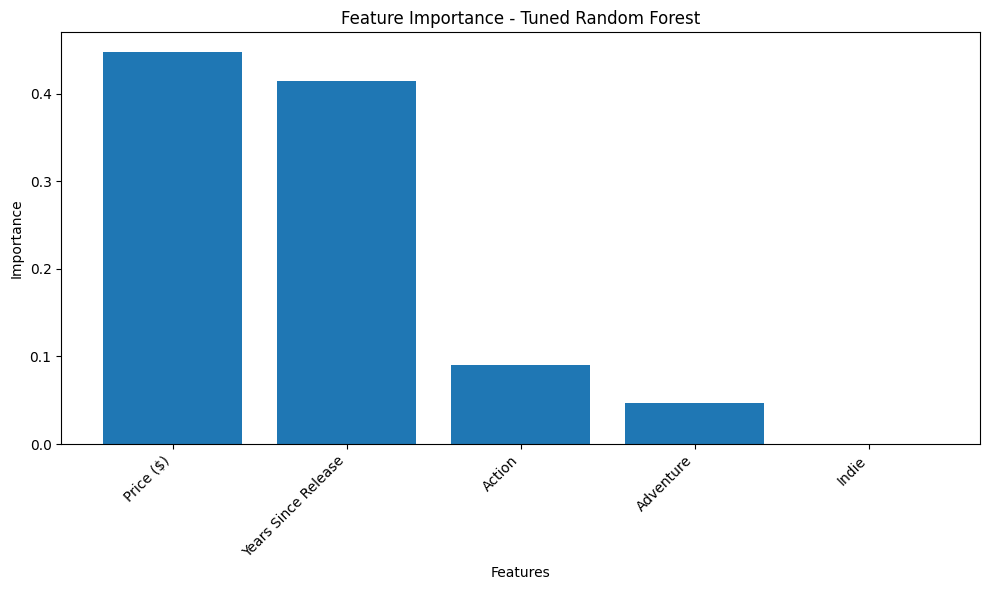

In [15]:
# Get feature importances from the tuned Random Forest model
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns  # Adjust if you used a different method for column names

# Sort the feature importances for better visualization
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=45, ha="right")
plt.title("Feature Importance - Tuned Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [16]:
# Cell 10: Train and Evaluate SVM Model

from sklearn.svm import SVC

# Initialize SVM with basic settings
svm_model = SVC(random_state=42, class_weight='balanced')

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("\nSVM Accuracy with Combined Features:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



SVM Accuracy with Combined Features: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.60      0.59        35
           1       0.36      0.35      0.36        23

    accuracy                           0.50        58
   macro avg       0.47      0.47      0.47        58
weighted avg       0.50      0.50      0.50        58


Confusion Matrix:
 [[21 14]
 [15  8]]


In [17]:
# Cell 11: Hyperparameter Tuning for SVM

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Set up GridSearchCV
svm_grid_search = GridSearchCV(SVC(random_state=42, class_weight='balanced'), param_grid_svm, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
svm_grid_search.fit(X_train, y_train)

# Get best parameters and train final model
best_svm_params = svm_grid_search.best_params_
print("\nBest Parameters for SVM:", best_svm_params)
print("\nBest Cross-Validated Accuracy:", svm_grid_search.best_score_)



Best Parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}

Best Cross-Validated Accuracy: 0.6025120772946859


In [18]:
# Cell 12: Train and Evaluate the Tuned SVM Model

# Train the SVM model with the best parameters
svm_tuned_model = SVC(C=1, gamma='auto', kernel='poly', random_state=42, class_weight='balanced')
svm_tuned_model.fit(X_train, y_train)

# Make predictions
y_pred_svm_tuned = svm_tuned_model.predict(X_test)

# Evaluate the tuned SVM model
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_tuned))


Tuned SVM Accuracy: 0.5517241379310345

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.69      0.65        35
           1       0.42      0.35      0.38        23

    accuracy                           0.55        58
   macro avg       0.52      0.52      0.51        58
weighted avg       0.54      0.55      0.54        58


Confusion Matrix:
 [[24 11]
 [15  8]]


### Model Performance Summary

| Model                           | Accuracy | Precision (Class 0) | Recall (Class 0) | Precision (Class 1) | Recall (Class 1) |
|---------------------------------|----------|---------------------|------------------|---------------------|------------------|
| Logistic Regression (Combined Features) | 56.90%   | 0.65                | 0.63             | 0.46                | 0.48             |
| Random Forest (Combined Features)       | 60.34%   | 0.66                | 0.71             | 0.50                | 0.43             |
| Tuned Random Forest                     | **66.00%**   | 0.67                | 0.86             | 0.62                | 0.35             |
| SVM (Combined Features)                 | 50.00%   | 0.58                | 0.60             | 0.36                | 0.35             |
| Tuned SVM                               | 55.17%   | 0.62                | 0.69             | 0.42                | 0.35             |

**Key Observations**:
- **Random Forest** performed the best after tuning, achieving an accuracy of **66%**.
- **SVM** struggled with accuracy, even after hyperparameter tuning, indicating it may not be the best model for this dataset.
- **Logistic Regression** also showed moderate performance but was outperformed by Random Forest.
